# Buy and Hold

## Import Library

In [1]:
import sys
sys.path.append('../../')

In [2]:

from config.constants import *
from backtesting import Backtest, Strategy
from backtesting.lib import plot_heatmaps, resample_apply
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from util.ATR import ATR
from util.SMA import SMA
from util.plot_equity import plot_equity_trades
from util.load_data import load_data


## Get Data

In [3]:
XAUUSD = load_data()

In [4]:
XAUUSD['D1'].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5043 entries, 2007-01-01 to 2023-03-10
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    5043 non-null   float64
 1   High    5043 non-null   float64
 2   Low     5043 non-null   float64
 3   Close   5043 non-null   float64
 4   Volume  5043 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 236.4 KB


## Define Strategy

```python
class SMA_crossover(Strategy) :
    ATR_SL = 0.5
    def init(self):
        self.data.df['ATR'] = ATR(self.data.df, 20)['ATR']
        self.data.df['sma_fast'] = SMA(self.data.df,50,200)['sma_fast']
    def next(self):

        pre_sma_fast = self.data.df.loc[self.data.df.index[-2], 'sma_fast']
        pre_sma_low = self.data.df.loc[self.data.df.index[-2], 'sma_slow']
        current_sma_fast = self.data.df.loc[self.data.df.index[-1], 'sma_fast']
        current_sma_low = self.data.df.loc[self.data.df.index[-1], 'sma_slow']
        current_ATR = self.data.df.loc[self.data.df.index[-1], 'ATR']

        if  pre_sma_fast < pre_sma_low and current_sma_fast >= current_sma_low and  not self.position :
            tp = self.data.Close + current_ATR * self.ATR_SL
            sl = self.data.Close - current_ATR * self.ATR_SL
            # Place your buy logic here
            self.buy(sl=sl, tp=tp, size=1)

        if pre_sma_fast > pre_sma_low and current_sma_fast <= current_sma_low and not self.position:
            tp = self.data.Close - current_ATR * self.ATR_SL
            sl = self.data.Close + current_ATR * self.ATR_SL
               
            self.sell(sl=sl, tp=tp, size=1)
```

In [5]:
class BuyAndHold(Strategy):

    def init(self):
        pass
    def next(self):
        if self.position :
            self.position.close()
            self.buy(size=1)
        elif not self.position:
            self.buy(size=1)
       

In [6]:
account_size = 20000

In [7]:
strategy = BuyAndHold

# Backtest each time frame

## TF D1

In [8]:
Backtest_D1 = Backtest(XAUUSD['D1'], strategy, cash=account_size, margin=1/2000, )
result_D1 = Backtest_D1.run()
result_D1

Start                     2007-01-01 00:00:00
End                       2023-03-10 00:00:00
Duration                   5912 days 00:00:00
Exposure Time [%]                   99.960341
Equity Final [$]                    21225.069
Equity Peak [$]                     21430.149
Return [%]                           6.125345
Buy & Hold Return [%]               193.12344
Return (Ann.) [%]                    0.297518
Volatility (Ann.) [%]                1.001867
Sharpe Ratio                         0.296964
Sortino Ratio                        0.406346
Calmar Ratio                         0.073904
Max. Drawdown [%]                    -4.02575
Avg. Drawdown [%]                   -0.202405
Max. Drawdown Duration     3261 days 00:00:00
Avg. Drawdown Duration       79 days 00:00:00
# Trades                                 5041
Win Rate [%]                        53.362428
Best Trade [%]                      10.973351
Worst Trade [%]                     -9.290183
Avg. Trade [%]                    

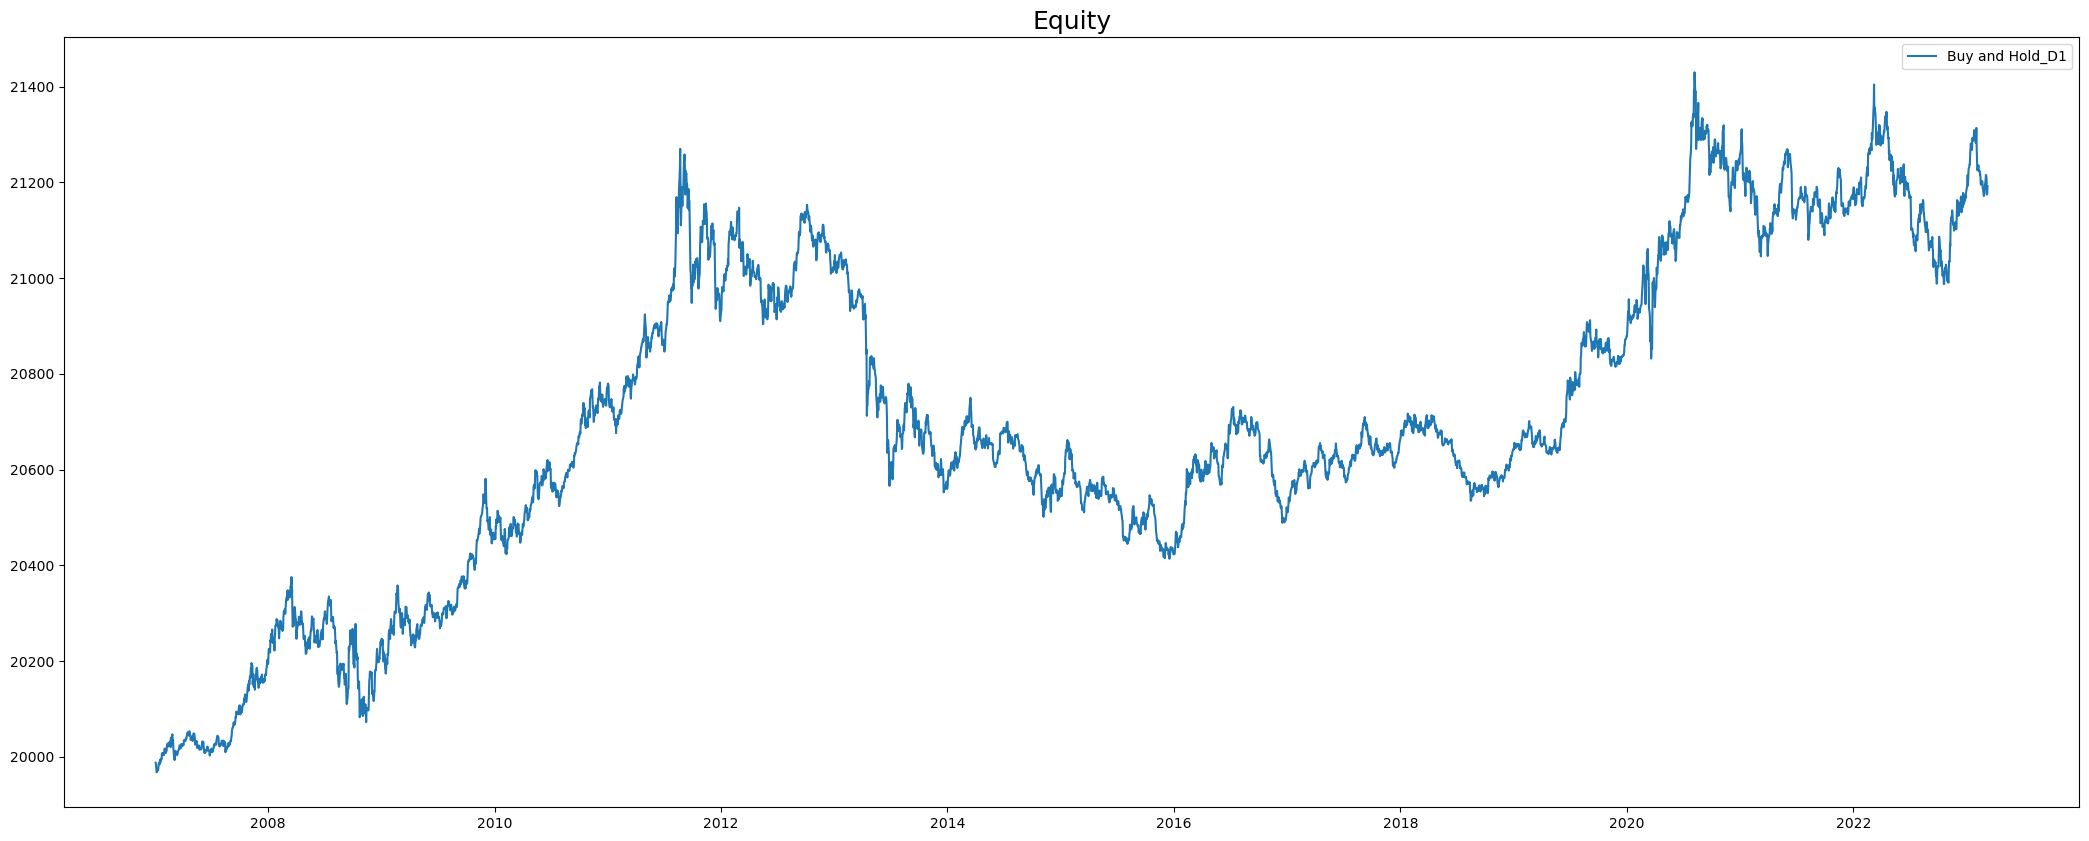

In [9]:
plot_equity_trades(result_D1['_trades'],'Buy and Hold_D1' , account_size)

## TF H4

In [10]:
Backtest_H4 = Backtest(XAUUSD['H4'], strategy,
                       cash=account_size, margin=1/2000, )
result_H4 = Backtest_H4.run()
result_H4

Start                     2007-01-01 00:00:00
End                       2023-03-10 16:00:00
Duration                   5912 days 16:00:00
Exposure Time [%]                   99.992301
Equity Final [$]                    21228.318
Equity Peak [$]                     21433.398
Return [%]                            6.14159
Buy & Hold Return [%]              193.329158
Return (Ann.) [%]                    0.298245
Volatility (Ann.) [%]                1.001725
Sharpe Ratio                         0.297731
Sortino Ratio                          0.4074
Calmar Ratio                         0.073895
Max. Drawdown [%]                   -4.036074
Avg. Drawdown [%]                   -0.105766
Max. Drawdown Duration     3261 days 00:00:00
Avg. Drawdown Duration       31 days 19:00:00
# Trades                                25974
Win Rate [%]                        50.950951
Best Trade [%]                       6.728522
Worst Trade [%]                     -5.296936
Avg. Trade [%]                    

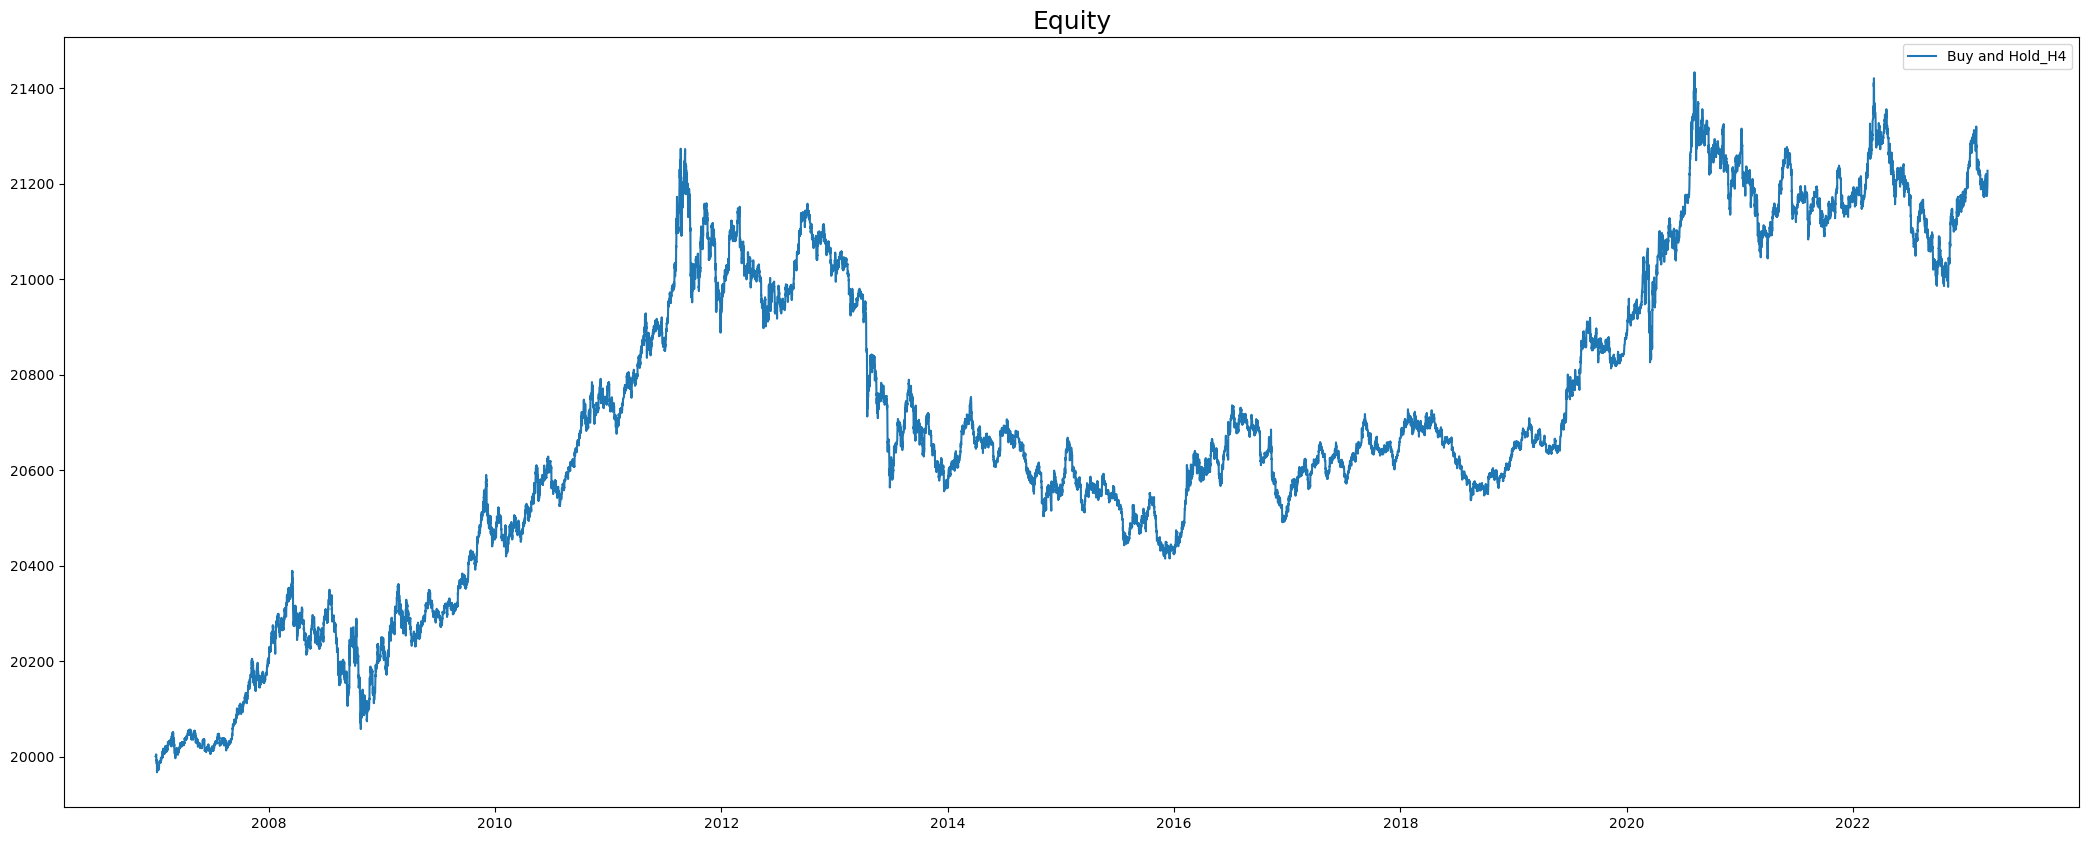

In [11]:
plot_equity_trades(result_H4['_trades'], 'Buy and Hold_H4', account_size)

## TF H1

In [12]:
Backtest_H1 = Backtest(XAUUSD['H1'], strategy,
                       cash=account_size, margin=1/2000, )
result_H1 = Backtest_H1.run()
result_H1

Start                     2007-01-01 00:00:00
End                       2023-03-10 17:00:00
Duration                   5912 days 17:00:00
Exposure Time [%]                   99.997958
Equity Final [$]                    21228.723
Equity Peak [$]                     21434.753
Return [%]                           6.143615
Buy & Hold Return [%]               193.27055
Return (Ann.) [%]                    0.298239
Volatility (Ann.) [%]                1.001706
Sharpe Ratio                         0.297731
Sortino Ratio                          0.4074
Calmar Ratio                         0.073142
Max. Drawdown [%]                   -4.077559
Avg. Drawdown [%]                   -0.068785
Max. Drawdown Duration     3246 days 20:00:00
Avg. Drawdown Duration       16 days 20:00:00
# Trades                                97952
Win Rate [%]                        50.554353
Best Trade [%]                       4.084206
Worst Trade [%]                     -5.291216
Avg. Trade [%]                    

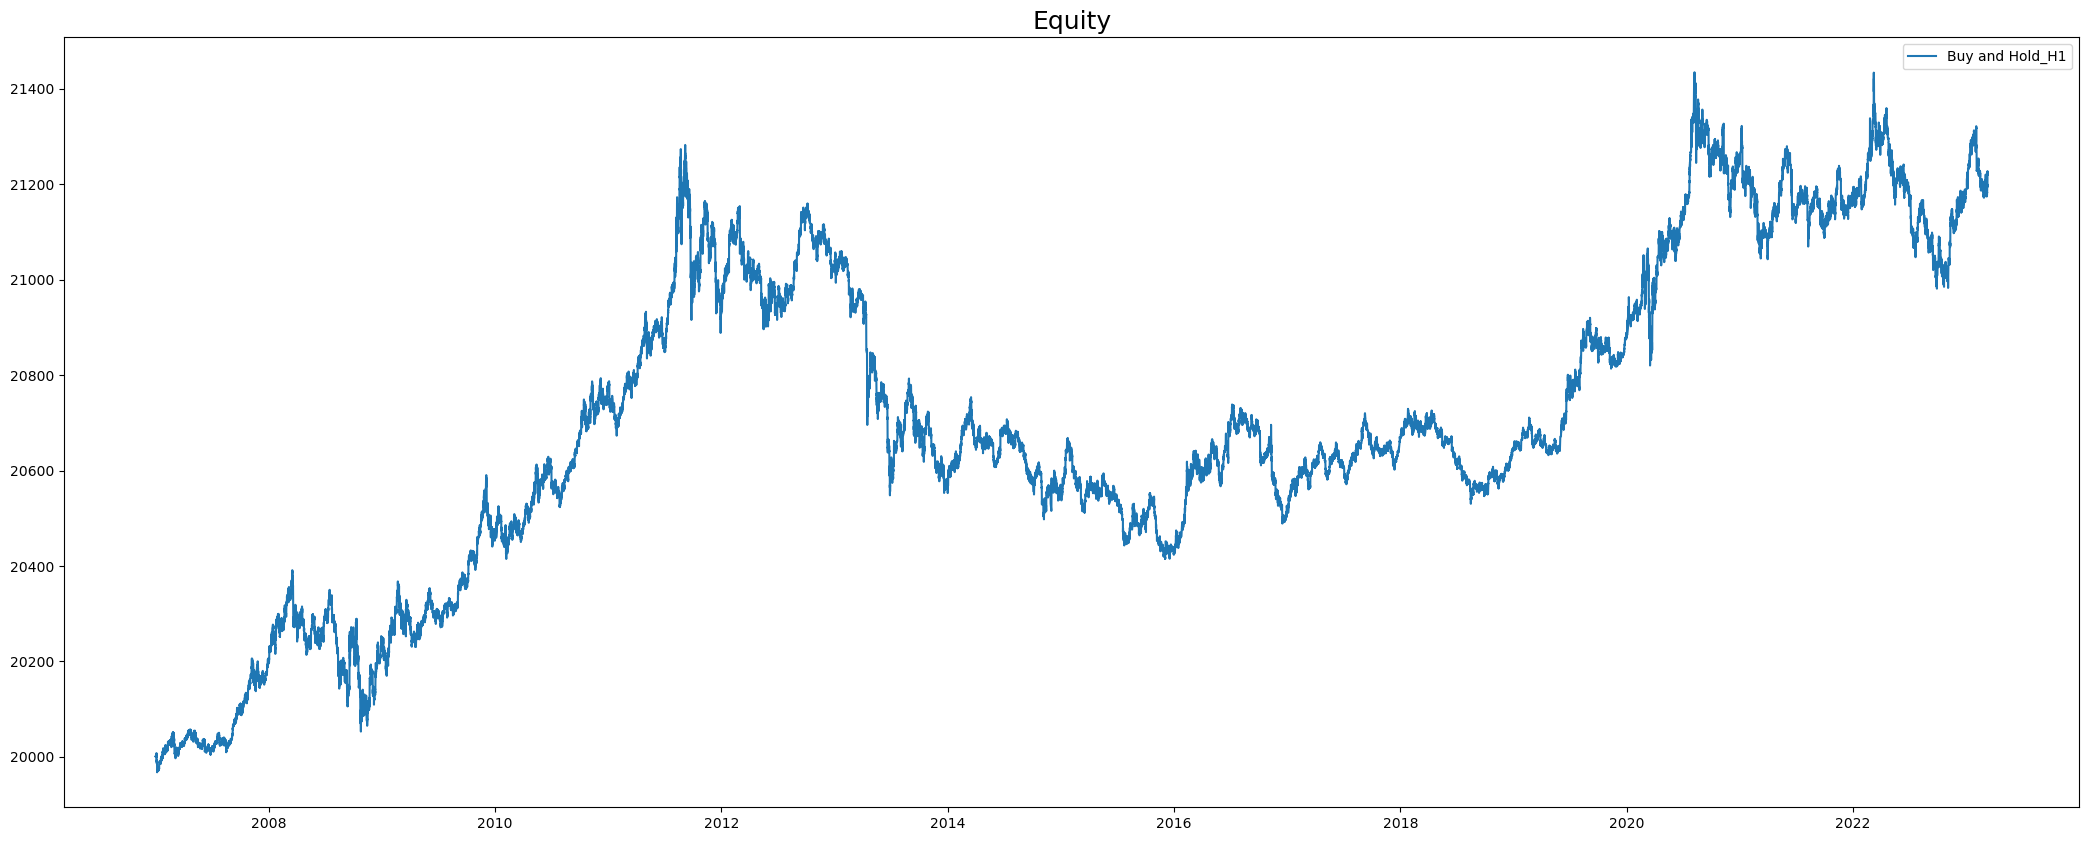

In [13]:
plot_equity_trades(result_H1['_trades'], 'Buy and Hold_H1', account_size)

## TF M30 

In [14]:
Backtest_M30 = Backtest(XAUUSD['M30'], strategy,
                       cash=account_size, margin=1/2000, )
result_M30 = Backtest_M30.run()
result_M30

Start                     2007-01-01 00:00:00
End                       2023-03-10 17:30:00
Duration                   5912 days 17:30:00
Exposure Time [%]                   99.998976
Equity Final [$]                    21228.314
Equity Peak [$]                     21434.344
Return [%]                            6.14157
Buy & Hold Return [%]              193.338852
Return (Ann.) [%]                    0.298245
Volatility (Ann.) [%]                1.001725
Sharpe Ratio                         0.297731
Sortino Ratio                          0.4074
Calmar Ratio                         0.072747
Max. Drawdown [%]                    -4.09974
Avg. Drawdown [%]                   -0.056072
Max. Drawdown Duration     3246 days 19:30:00
Avg. Drawdown Duration       12 days 16:42:00
# Trades                               195235
Win Rate [%]                        50.237918
Best Trade [%]                       3.048752
Worst Trade [%]                     -3.666351
Avg. Trade [%]                    

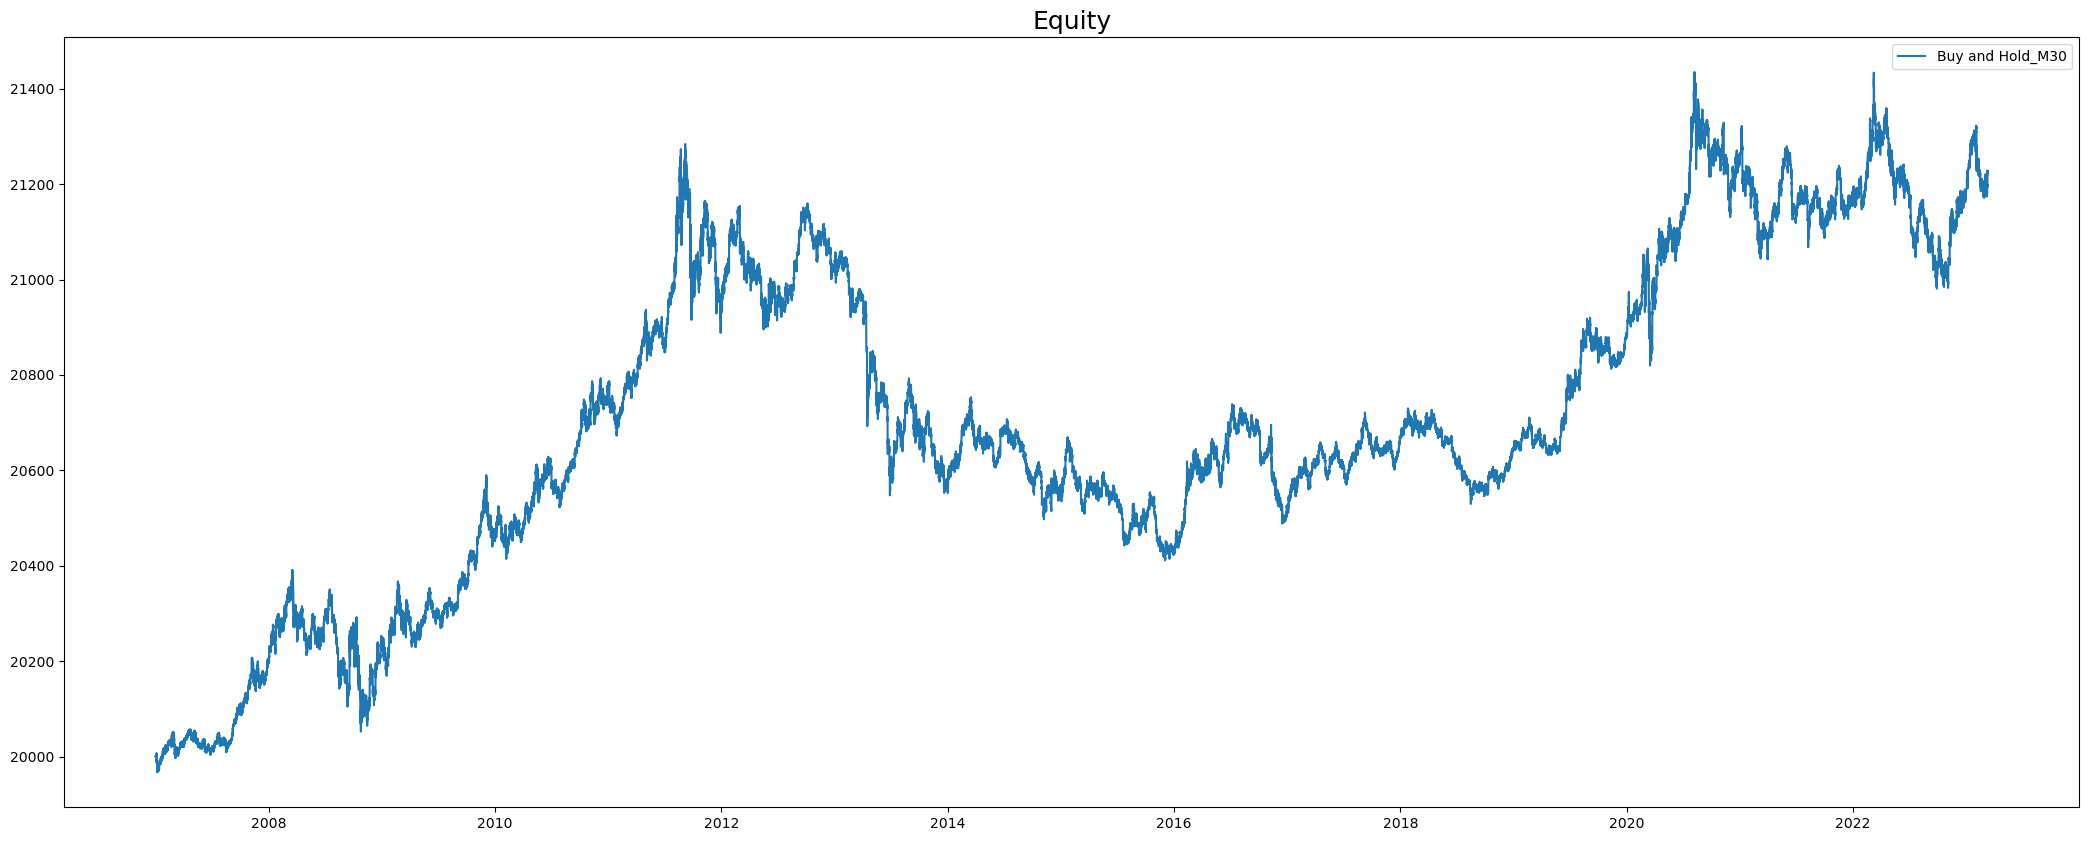

In [15]:
plot_equity_trades(result_M30['_trades'], 'Buy and Hold_M30', account_size)